<a href="https://colab.research.google.com/github/sidharthmrao/Chess_AI_Bot/blob/master/ChessAIBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





Board:




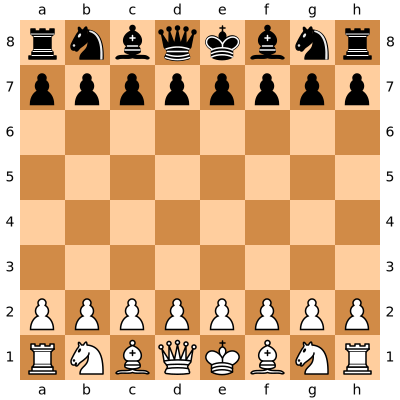


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50


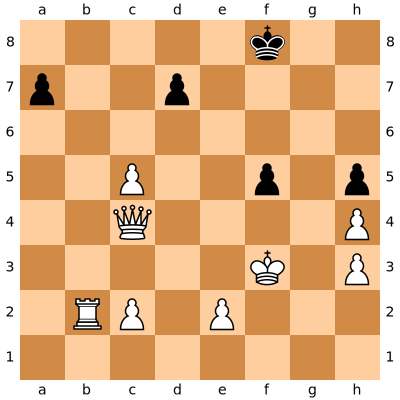

52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
Draw
99
Move 1: White moved h2h4
Move 2: Black moved e7e6
Move 3: White moved h1h3
Move 4: Black moved d8f6
Move 5: White moved g1f3
Move 6: Black moved f6f3
Move 7: White moved b1c3
Move 8: Black moved f3h3
Move 9: White moved c3b1
Move 10: Black moved e8e7
Move 11: White moved g2h3
Move 12: Black moved b7b5
Move 13: White moved d2d3
Move 14: Black moved b5b4
Move 15: White moved f1g2
Move 16: Black moved b4b3
Move 17: White moved f2f4
Move 18: Black moved b3a2
Move 19: White moved b1a3
Move 20: Black moved b8a6
Move 21: White moved f4f5
Move 22: Black moved e6f5
Move 23: White moved g2a8
Move 24: Black moved h7h5
Move 25: White moved e1f2
Move 26: Black moved c8b7
Move 27: White moved a8b7
Move 28: Black moved f5f4
Move 29: White moved b7a6
Move 30: Black moved f4f3
Move 31: White moved f2f3
Move 32: Black moved g7g5
Move 33: White moved c1g5
Move 34: Black moved e7e8
Move 35: White moved a1a2
Move 36: Black move

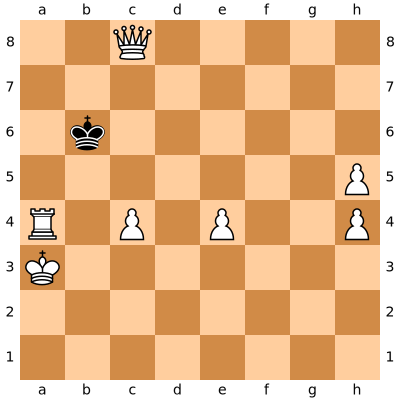

None
[[array([['Rb1', 'KNb1', 'Bb1', 'Qb', 'Ib', 'Bb2', 'KNb2', 'Rb2'],
       ['Pb1', 'Pb2', 'Pb3', 'Pb4', 'Pb5', 'Pb6', 'Pb7', 'Pb8'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk'],
       ['Pw1', 'Pw2', 'Pw3', 'Pw4', 'Pw5', 'Pw6', 'Pw7', 'Pw8'],
       ['Rw1', 'KNw1', 'Bw1', 'Qw', 'Iw', 'Bw2', 'KNw2', 'Rw2']],
      dtype='<U4'), ['Pw8', 4, 7, 'blank', 'possible', 'None', 6, 7], 2870.4844618153597], [array([['Rb1', 'KNb1', 'Bb1', 'Qb', 'Ib', 'Bb2', 'KNb2', 'Rb2'],
       ['Pb1', 'Pb2', 'Pb3', 'Pb4', 'blk', 'Pb6', 'Pb7', 'Pb8'],
       ['blk', 'blk', 'blk', 'blk', 'Pb5', 'blk', 'blk', 'blk'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'Pw8'],
       ['blk', 'blk', 'blk', 'blk', 'blk', 'blk', 'blk'

In [23]:
#from google.colab import drive
#drive.mount('/content/drive')


#fil = open("/content/drive/My Drive/Colab Notebooks/Data/ChessRewards.txt", r+)
fil = []

import numpy as np
import copy
import pandas as pd
import chess
import chess.svg
from IPython.display import SVG




gamehistory = []
epsilon = 0
gamma = 0


##CHESS FRAME

class frameboard():


  #Creates a gameboard in its original state
  def createboard():
    #creates a dictionary of all parts and some booleans:
    # The value is the piece name
    # The first item in the list is the same
    # The second is whether the piece is captured or active (dead or alive)
    # The third is only for kings and rooks; it tells you if they moved or not, helping in castling
    pieces = {'Rb1'   :   ['Rb1'  , 'Active', False], 
              'KNb1'  :   ['KNb1' , 'Active' ],
              'Bb1'   :   ['Bb1'  , 'Active'], 
              'Qb'    :   ['Qb'   , 'Active'], 
              'Ib'    :   ['Ib'   , 'Active', False], 
              'Bb2'   :   ['Bb2'  , 'Active'], 
              'KNb2'  :   ['KNb2' , 'Active'], 
              'Rb2'   :   ['Rb2'  , 'Active', False],
              'Pb1'   :   ['Pb1'  , 'Active'],
              'Pb2'   :   ['Pb2'  , 'Active'],
              'Pb3'   :   ['Pb3'  , 'Active'],
              'Pb4'   :   ['Pb4'  , 'Active'],
              'Pb5'   :   ['Pb5'  , 'Active'],
              'Pb6'   :   ['Pb6'  , 'Active'],
              'Pb7'   :   ['Pb7'  , 'Active'],
              'Pb8'   :   ['Pb8'  , 'Active'],

              'Rw1'   :   ['Rw1'  , 'Active', False],
              'KNw1'  :   ['KNw1' , 'Active'],
              'Bw1'   :   ['Bw1'  , 'Active'], 
              'Qw'    :   ['Qw'   , 'Active'], 
              'Iw'    :   ['Iw'   , 'Active', False], 
              'Bw2'   :   ['Bw2'  , 'Active'], 
              'KNw2'  :   ['KNw2' , 'Active'], 
              'Rw2'   :   ['Rw2'  , 'Active', False],
              'Pw1'   :   ['Pw1'  , 'Active'],
              'Pw2'   :   ['Pw2'  , 'Active'],
              'Pw3'   :   ['Pw3'  , 'Active'],
              'Pw4'   :   ['Pw4'  , 'Active'],
              'Pw5'   :   ['Pw5'  , 'Active'],
              'Pw6'   :   ['Pw6'  , 'Active'],
              'Pw7'   :   ['Pw7'  , 'Active'],
              'Pw8'   :   ['Pw8'  , 'Active'],

              'blk'   :   ['  '   , 'Active'] }       


    # This is the board. Blk means blank. The first letter (or two letters in the case of Knights) signifies the piece
    #The next letter signifies the team
    board = [['Rb1', 'KNb1', 'Bb1', 'Qb' , 'Ib' , 'Bb2', 'KNb2', 'Rb2' ],
             ['Pb1', 'Pb2' , 'Pb3', 'Pb4', 'Pb5', 'Pb6', 'Pb7' , 'Pb8' ],
             ['blk', 'blk' , 'blk', 'blk', 'blk', 'blk', 'blk' , 'blk' ],
             ['blk', 'blk' , 'blk', 'blk', 'blk', 'blk', 'blk' , 'blk' ],
             ['blk', 'blk' , 'blk', 'blk', 'blk', 'blk', 'blk' , 'blk' ],
             ['blk', 'blk' , 'blk', 'blk', 'blk', 'blk', 'blk' , 'blk' ],
             ['Pw1', 'Pw2' , 'Pw3', 'Pw4', 'Pw5', 'Pw6', 'Pw7' , 'Pw8' ],
             ['Rw1', 'KNw1', 'Bw1', 'Qw' , 'Iw' , 'Bw2', 'KNw2', 'Rw2' ]]

    board = np.asarray(board) #Formats into numpy array for easy display
    return pieces, board



"""##################################################################################################"""#########################################################






class moves():


  #Verifies the value of a location (can it be moved into, is there another piece there, if so, from team of piece or opposing team?)
  def verify(move, piece, board):

    if move[0]<0 or move[0]>7 or move[1]<0 or move[1]>7:
      return 'impossible'

    spot = board[move[0], move[1]]
    piece = board[piece[0], piece[1]]

    if spot == 'blk':
      return 'blank'

    elif (('w' in piece) and ('b' in spot)) or (('b' in piece) and ('w' in spot)):
      return spot

    else:
      return 'impossible'


  # Remove all Impossible Moves
  def removeimp(possiblemoves): 
    temp = []
    for move in possiblemoves:
      if move[2] != "impossible":
        temp.append(move)
    return temp


  # All moves of a pawn 
  def pawn(piece, board):
    row = piece[0]
    column = piece[1]
    possiblemoves = []
    if 'b' in board[row][column]: #if piece is Black
      if row == 1: #and in row 1
        possiblemoves = [[row+1, column], [row+2, column], [row+1, column+1], [row+1, column-1]]  #it can move up two, up 1, or diagonal by 1
      else: #but not in row 1
        possiblemoves = [[row+1, column], [row+1, column+1], [row+1, column-1]] #it can move up 1, or diagonal by 1


    elif 'w' in board[row][column]:# same for White
      if row == 6:
        possiblemoves = [[row-1, column], [row-2, column], [row-1, column+1], [row-1, column-1]]
      else:
        possiblemoves = [[row-1, column], [row-1, column+1], [row-1, column-1]]

    #pass through verify function in order to check to make sure the move is valid
    for possiblemove in possiblemoves:
      possiblemove.append(moves.verify(possiblemove, piece, board))

    if len(possiblemoves)==4: #if on first row
      #The last 2 moves are killing moves, meaning that they can only be executed in order to kill/capture a piece
      if possiblemoves[2][2] == 'blank': 
        possiblemoves[2][2] = 'impossible'
      if possiblemoves[3][2] == 'blank':
        possiblemoves[3][2] = 'impossible'
      #The first 2 moves are non-killing moves, meaning that they cannot be executed in order to kill/capture a piece
      if possiblemoves[0][2] != 'blank':
        possiblemoves[0][2] = 'impossible'
        possiblemoves[1][2] = 'impossible'
      if possiblemoves[1][2] != 'blank':
        possiblemoves[1][2] = 'impossible'

    if len(possiblemoves)==3: #if not on first row
    #same as above, but with two killing moves
      if possiblemoves[0][2] != 'blank':
        possiblemoves[0][2] = 'impossible'
      if possiblemoves[1][2] == 'blank':
        possiblemoves[1][2] = 'impossible'
      if possiblemoves[2][2] == 'blank':
        possiblemoves[2][2] = 'impossible'
    
    return possiblemoves


  #all possible moves for a rook
  def rook(piece, board):
    row = piece[0]
    column = piece[1]
    possiblemoves = []    
    #all raw moves that a rook can make
    for i in range(8):
      possiblemoves.append([row+i, column])
    for i in range(8):
      possiblemoves.append([row-i, column])
    for i in range(8):
      possiblemoves.append([row, column+i])
    for i in range(8):
      possiblemoves.append([row, column-i])
    #"trims" the raw moves to fit on the board
    for possiblemove in possiblemoves:
      possiblemove.append(moves.verify(possiblemove, piece, board))
    
    for possiblemove in possiblemoves:
      #checks if anything is in the way
      if possiblemove[0]>row and possiblemove[1]==column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]>possiblemove[0] and possible[1]==possiblemove[1]:
            possible[2] = 'impossible'

      if possiblemove[0]<row and possiblemove[1]==column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]<possiblemove[0] and possible[1]==possiblemove[1]:
            possible[2] = 'impossible'    
      
      if possiblemove[0]==row and possiblemove[1]>column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]==possiblemove[0] and possible[1]>possiblemove[1]:
            possible[2] = 'impossible'

      if possiblemove[0]==row and possiblemove[1]<column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]==possiblemove[0] and possible[1]<possiblemove[1]:
            possible[2] = 'impossible'        
            
    return possiblemoves


  #all oves for bishop (very similar to rook but diagonal)
  def bishop(piece, board):
    row = piece[0]
    column = piece[1]    
    possiblemoves = []
    #all raw moves of a bishop
    for i in range(8):
      possiblemoves.append([row+i, column+i])
    for i in range(8):
      possiblemoves.append([row-i, column+i])
    for i in range(8):
      possiblemoves.append([row+i, column-i])
    for i in range(8):
      possiblemoves.append([row-i, column-i])

    #"trims" the raw moves to fit on the board
    for possiblemove in possiblemoves:
      possiblemove.append(moves.verify(possiblemove, piece, board))
      #checks if anything is in the way
    for possiblemove in possiblemoves:
      
      if possiblemove[0]>row and possiblemove[1]>column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]>possiblemove[0] and possible[1]>possiblemove[1]:
            possible[2] = 'impossible'

      if possiblemove[0]<row and possiblemove[1]<column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]<possiblemove[0] and possible[1]<possiblemove[1]:
            possible[2] = 'impossible'    
      
      if possiblemove[0]<row and possiblemove[1]>column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]<possiblemove[0] and possible[1]>possiblemove[1]:
            possible[2] = 'impossible'

      if possiblemove[0]>row and possiblemove[1]<column and possiblemove[2] != 'blank':
        for possible in possiblemoves:
          if possible[0]>possiblemove[0] and possible[1]<possiblemove[1]:
            possible[2] = 'impossible'
            
    return possiblemoves


  #all possible moves of knight
  def knight(piece, board):
    row = piece[0]
    column = piece[1]
    #all raw moves
    possiblemoves = [[row+1, column+2], [row+1, column-2], [row-1, column-2], [row-1, column+2],[row+2, column-1], [row+2, column+1], [row-2, column+1], [row-2, column-1]] 
    #trims to board
    for possiblemove in possiblemoves:
      possiblemove.append(moves.verify(possiblemove, piece, board))
    return possiblemoves
  #all moves of king
  def king(piece, board):
    row = piece[0]
    column = piece[1]
    #all raw moves
    possiblemoves = [[row+1, column], [row+1, column+1], [row, column+1], [row-1, column+1],[row-1, column], [row-1, column-1], [row, column-1], [row+1, column-1]] 
    #trims to board
    for possiblemove in possiblemoves:
      possiblemove.append(moves.verify(possiblemove, piece, board))
    return possiblemoves      
  #all moves of queen
  def queen(piece, board):
    possiblemoves = []
    possiblemovers = []
    #simply adds rook and bishop
    possiblemovers = moves.rook(piece, board)
    for pos in possiblemovers:
        possiblemoves.append(pos)
    possiblemovers = moves.bishop(piece, board)
    for pos in possiblemovers:
        possiblemoves.append(pos)
    
    return possiblemoves


  #castling
  def castle(identity, pieces, board):

    possiblecastles = []

    if identity == 'Black':
      #checks if king has been moved
      if pieces['Ib'][2] == False:
        #checks if each rook has been moved
        if pieces['Rb1'][2] == False: #if not moved and nothing is in the way, places castle
          if board[0,4] == 'Ib' and board[0,3] == 'blk' and board[0,2] == 'blk' and board[0,1] == 'blk' and board[0,0] == 'Rb1':
            possiblecastles.append(['Ib', 0, 2 , 'Rb1', 0, 3])
        if pieces['Rb2'][2] == False: #if not moved and nothing is in the way, places castle
          if board[0,4] == 'Ib' and board[0,5] == 'blk' and board[0,6] == 'blk' and board[0,7] == 'Rb2':
            possiblecastles.append(['Ib', 0, 6 , 'Rb2', 0, 5])
    
    if identity == 'White':
      #same as previous but with white
      if pieces['Iw'][2] == False:
        if pieces['Rw1'][2] == False:
          if board[7,4] == 'Iw' and board[7,3] == 'blk' and board[7,2] == 'blk' and board[7,1] == 'blk' and board[7,0] == 'Rw1':
            possiblecastles.append(['Iw', 7, 2 , 'Rw1', 7, 3])
        if pieces['Rb2'][2] == False:
          if board[7,4] == 'Ib' and board[7,5] == 'blk' and board[7,6] == 'blk' and board[7,7] == 'Rw2':
            possiblecastles.append(['Iw', 7, 6 , 'Rw2', 7, 5])


    return possiblecastles


  #base of all moves (links all pieces to their respective movesets)
  def allmoves(identity, pieces, board):
    allmove = []
    keys = list(pieces.keys())
    if identity == 'White':
      for row in range(8):
        for column in range(8):
          if 'w' in board[row][column]:
            if 'P' in board[row][column]:
              allmove.append([board[row][column], moves.pawn([row,column], board)])
            if 'R' in board[row][column]:
              allmove.append([board[row][column], moves.rook([row,column], board)])
            if 'KN' in board[row][column]:
              allmove.append([board[row][column], moves.knight([row,column], board)])
            if 'B' in board[row][column]:
              allmove.append([board[row][column], moves.bishop([row,column], board)])
            if 'Q' in board[row][column]:
              allmove.append([board[row][column], moves.queen([row,column], board)])
            if 'I' in board[row][column]:
              allmove.append([board[row][column], moves.king([row,column], board)])

    if identity == 'Black':
      for row in range(8):
        for column in range(8):
          if 'b' in board[row][column]:
            if 'P' in board[row][column]:
              allmove.append([board[row][column], moves.pawn([row,column], board)])
            if 'R' in board[row][column]:
              allmove.append([board[row][column], moves.rook([row,column], board)])
            if 'KN' in board[row][column]:
              allmove.append([board[row][column], moves.knight([row,column], board)])
            if 'B' in board[row][column]:
              allmove.append([board[row][column], moves.bishop([row,column], board)])
            if 'Q' in board[row][column]:
              allmove.append([board[row][column], moves.queen([row,column], board)])
            if 'I' in board[row][column]:
              allmove.append([board[row][column], moves.king([row,column], board)])

    allmoves = []
    #checks to make sure that the moves are possible and removes impossible moves
    for i in allmove:
      allmoves.append([i[0]])
      for c in i[1]:
        if c[2] != 'impossible':
          allmoves[len(allmoves)-1].append(c)

    allmoves.append(['Castle'])
    for asd in moves.castle(identity, pieces, board):
      allmoves[len(allmoves)-1].append(asd)

    return allmoves

  #Tests for whether a move is possible or not
  def tester(identity, move, pieces, board):

    chess_board = copy.deepcopy(board)
    check = False
    #Creates Temporary Vars for Castle (Weird System)
    if move[0] == 'Castle':

      name = move[1][0]
      name_row = move[1][1]
      name_column = move[1][2]
      move_to = move[1][3]
      move_row = move[1][4]
      move_column = move[1][5]

    #Creates Temporary Vars for any other type
    else:
      name = move[0]
      name_row = 0
      name_column = 0

      for i in range(len(chess_board)):
        for c in range(len(chess_board[i])):
          if chess_board[i][c] == name:
            name_row = i
            name_column = c


      move_row = move[1][0]
      move_column = move[1][1]
      move_to = move[1][2]
      captured = 'None'
      

    #Makes a fake board (chess_board) with the move implemented
    #If move is blank, just move it to the blank spot
    if move_to == 'blank':
      chess_board[move_row][move_column] = copy.deepcopy(name)
      chess_board[name_row][name_column] = 'blk'

    #If the move is capturing something, make 'captured' whatever its capturing
    else:
      chess_board[move_row][move_column] = copy.deepcopy(name)
      chess_board[name_row][name_column] = 'blk'
      captured = move_to

    #If it's Black, using the fake board with the move, find the moves of the other side
    #and check whether the king is in any of that side's moves
    if identity == 'Black':
      all = moves.allmoves('White', pieces, chess_board)
      for move in all:
        if move[0]!='castle':
          for d in move[1:]:
            chessboard = copy.deepcopy(board)
            if d[2] == 'Ib':
              return 'impossible', captured


    #Same for White
    if identity == 'White':
      all = moves.allmoves('Black', pieces, chess_board)
      for newmove in all:
        if newmove[0]!='castle':
          for d in newmove[1:]:
            chessboard = copy.deepcopy(board)
            if d[2] == 'Iw':
              return 'impossible', captured

    return 'possible', captured
    

  #Returns a final list of moves
  def allmovesfinalimplement(identity, pieces, board):
    all = moves.allmoves(identity, pieces, board)
    newall = []
    for move in all:
      for c in move[1:]:
        #runs through tester
        thr, fou = moves.tester(identity, [move[0], c], pieces, board)
        c.append(thr)
        c.append(fou)
        c.insert(0, move[0])
        if c[len(c)-2] == 'possible':
          newall.append(c)
    return newall


  #Checks for pawn promotion
  def pawnpromo(identity, pieces, board):
    temp = moves.allmovesfinalimplement(identity, pieces, board)
    pawnprom = False
    x = "none"
    if identity == "White":
      for i in range(len(board[0])):
          square = board[0][i]
          if "P" in list(square):
            x = square
            pawnprom = True 
    elif identity == "Black":
      for move in temp:
       for square in board[7]:
          if "P" in list(square):
            x = square
            pawnprom = True 
    return pawnprom, x


  #checks if the king is undercheck
  def checkbool(sign, piece, board):
    check = False
    if sign=="Black": 
      temp = moves.allmovesfinalimplement("White", pieces, board)
      for i in range(len(moves.allmovesfinalimplement("White", pieces, board))):
            if "Ib" in temp[i]:
              check = True
    elif sign == "White":
      temp = moves.allmovesfinalimplement("Black", pieces, board)
      for i in range(len(moves.allmovesfinalimplement("Black", pieces, board))):
            if "Iw" in temp[i]:
              check = True   
    return check


  #checks to make sure that stalemate and checkmate haven't already occured
  def CheckStaleMate(sign, pieces, board):
   if len(moves.allmovesfinalimplement(sign, pieces, board)) ==0:
     check = moves.checkbool(sign, pieces, board)
     if check == True:
       return f"{str(sign)} has lost."
     elif check == False:
       return 'Draw'
   else:
     return False

     
  #movement function that allows you to move a piece if it is possible move set
  def movement(move, identity, pieces, board):
    name = move[0]
    #movement if not castle:
    #creates temp vars to ease the rest of the programming
    if name!='Castle':
      name_row = 0
      name_column = 0
      move_row = move[1]
      move_column = move[2]
      captured = move[5]
      #finds present coordinates of piece and assigns temp vars
      for i in range(len(board)):
        for c in range(len(board[i])):
          if board[i][c] == name:
            name_row = i
            name_column = c
      #if it is a rook or king, moving update the status (helps when looking into castling)
      if 'I' in name or 'R' in name:
        pieces[name][2] = 'Moved'
      #if there is a piece in the move, it updates the status to captures
      if captured!='None':
        pieces[captured][1] = 'Captured'
      #this part actullay moves the piece
      board[name_row][name_column] = 'blk'
      board[move_row][move_column] = name

      move.append(name_row)
      move.append(name_column)
      return move
    #movement for castling:
    #assigns temp vars
    else:    #movement for castling:
    #assigns temp vars
      name = move[1]
      name_row = move[2]
      name_column = move[3]
      name_prev_row = 0
      name_prev_column = 0
      # assigns temp vars for prospective coordinates
      for i in range(len(board)):
        for c in range(len(board[i])):
          if board[i][c] == name:
            name_prev_row = i
            name_prev_column = c
      move_name = move[4]
      move_row = move[5]
      move_column = move[6]
      move_prev_row = 0
      move_prev_column = 0
      for i in range(len(board)):
        for c in range(len(board[i])):
          if board[i][c] == move_name:
            move_prev_row = i
            move_prev_column = c

      captured = move[8]
      #updates king and rook to moves
      pieces[name][2] = 'Moved'
      pieces[move_name][2] = 'Moved'
      #moves the king and rook
      board[name_row][name_column] = move_name
      board[move_row][move_column] = name
      board[move_prev_row][move_prev_column] = 'blk'
      board[name_prev_row][name_prev_column] = 'blk'
      move.append(name_row)
      move.append(name_column)
      return move


#DISPLAY DEFENITIONS

def displaymoves(allmoves):
  moves = copy.deepcopy(allmoves)
  aToNumb = {0: 'A',
             1: 'B',
             2: 'C',
             3: 'D',
             4: 'E',
             5: 'F',
             6: 'G',
             7: 'H'}

  for i in range(len(moves)):

    if len(moves[i]) == 6:
      z = 0
      moves[i][1] = 8-int(moves[i][1])
      moves[i][2] = aToNumb.get(int(moves[i][2]))
    
    else:
      z = 1
      if int(moves[i][2])>4:
        moves[i][1] = "King"
        moves[i][2] = "Side"
      elif int(moves[i][2])<4:
        moves[i][1] = "Queen"
        moves[i][2] = "Side"
  if z == 0:
    newermoves = np.asarray(moves)[:len(moves),:4]
  if z == 1:
    moves[len(moves)-1] = ([moves[len(moves)-1][0], moves[len(moves)-1][1], moves[len(moves)-1][2], moves[len(moves)-1][4], "blah", "blah"])
    newermoves = np.asarray(moves)[:len(moves),:4]
    
  result = pd.DataFrame(newermoves, columns = ['Piece', 'Row', 'Column', 'Captured'])
  result.index += 1
  print(result)
  

def displayboard(board, move, promotion, team):

  aToNumb = {0: 'a',
             1: 'b',
             2: 'c',
             3: 'd',
             4: 'e',
             5: 'f',
             6: 'g',
             7: 'h'}

  nToNumb = {0: '8',
             1: '7',
             2: '6',
             3: '5',
             4: '4',
             5: '3',
             6: '2',
             7: '1'}

  if move!= 'none':
    if len(move) == 8:
      origrow = nToNumb[move[6]]
      origcol = aToNumb[move[7]]
      
      newrow = nToNumb[move[1]]
      newcol = aToNumb[move[2]]

      uci = str(origcol) + str(origrow) + str(newcol) + str(newrow)

      if promotion!='none':
        uci += promotion

      gamehistory.append(uci)

      specboard.push_uci(uci)

    else:

      if team == 'White':
        if int(move[3])>4:
          uci = "e1g1"
        elif int(move[3])<4:
          uci = "e1c1"
      else:
        if int(move[3])>4:
          uci = "e8g8"
        elif int(move[3])<4:
          uci = "e8c8"

      gamehistory.append(uci)
      specboard.push_uci(uci)


      """if int(move[3])>4:
        uci = "O-O"
        gamehistory.append(uci)
        specboard.push_san(uci)
      if int(move[3])<4:
        uci = "O-O-O"
        gamehistory.append(uci)
        specboard.push_san(uci)"""
  

  #display(SVG(chess.svg.board(board=specboard,size=400)))

def tie(pieces):
  num = -1
  for key in pieces.keys():
    if pieces[key][1] == 'Active':
      num+=1

  if num <= 2:
    return 'Tie'
  else:
    return 'Con'

def loadhistory(history, move):
  if move == 0:

    specboard = chess.Board()
    for move in history:
      if move!= 'O-O' and move!= 'O-O-O':
        specboard.push_uci(move)
      else:
        specboard.push_san(move)

  else:
    specboard = chess.Board()
    for move in history[:move]:
      if move!= 'O-O' and move!= 'O-O-O':
        specboard.push_uci(move)
      else:
        specboard.push_san(move)

  display(SVG(chess.svg.board(board=specboard,size=400)))

######################################################### Artificial Rewards




pawntable = [
 0,  0,  0,  0,  0,  0,  0,  0,
 5, 10, 10,-20,-20, 10, 10,  5,
 5, -5,-10,  0,  0,-10, -5,  5,
 0,  0,  0, 20, 20,  0,  0,  0,
 5,  5, 10, 30, 30, 10,  5,  5,
10, 10, 20, 25, 25, 20, 10, 10,
50, 50, 50, 50, 50, 50, 50, 50,
 0,  0,  0,  0,  0,  0,  0,  0]

pawntable = np.asarray(pawntable)
pawntable = pawntable.reshape(8,8) 

knightstable = [
-50,-40,-30,-30,-30,-30,-40,-50,
-40,-20,  0,  5,  5,  0,-20,-40,
-30,  5, 10, 15, 15, 10,  5,-30,
-30,  0, 15, 20, 20, 15,  0,-30,
-30,  5, 15, 20, 20, 15,  5,-30,
-30,  0, 10, 15, 15, 10,  0,-30,
-40,-20,  0,  0,  0,  0,-20,-40,
-50,-40,-30,-30,-30,-30,-40,-50]

knightstable = np.asarray(knightstable)
knightstable = knightstable.reshape(8,8) 

bishopstable = [
-20,-10,-10,-10,-10,-10,-10,-20,
-10,  5,  0,  0,  0,  0,  5,-10,
-10, 10, 10, 10, 10, 10, 10,-10,
-10,  0, 10, 10, 10, 10,  0,-10,
-10,  5,  5, 10, 10,  5,  5,-10,
-10,  0,  5, 10, 10,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10,-10,-10,-10,-10,-20]

bishopstable = np.asarray(bishopstable)
bishopstable = bishopstable.reshape(8,8) 

rookstable = [
  0,  0,  0,  5,  5,  0,  0,  0,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
 -5,  0,  0,  0,  0,  0,  0, -5,
  5, 10, 10, 10, 10, 10, 10,  5,
 0,  0,  0,  0,  0,  0,  0,  0]

rookstable = np.asarray(rookstable)
rookstable = rookstable.reshape(8,8) 

queenstable = [
-20,-10,-10, -5, -5,-10,-10,-20,
-10,  0,  0,  0,  0,  0,  0,-10,
-10,  5,  5,  5,  5,  5,  0,-10,
  0,  0,  5,  5,  5,  5,  0, -5,
 -5,  0,  5,  5,  5,  5,  0, -5,
-10,  0,  5,  5,  5,  5,  0,-10,
-10,  0,  0,  0,  0,  0,  0,-10,
-20,-10,-10, -5, -5,-10,-10,-20]

queenstable = np.asarray(queenstable)
queenstable = queenstable.reshape(8,8) 

kingstable = [
 20, 30, 10,  0,  0, 10, 30, 20,
 20, 20,  0,  0,  0,  0, 20, 20,
-10,-20,-20,-20,-20,-20,-20,-10,
-20,-30,-30,-40,-40,-30,-30,-20,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30,
-30,-40,-40,-50,-50,-40,-40,-30]

kingstable = np.asarray(kingstable)
kingstable = kingstable.reshape(8,8) 

def testmovement(move, identity, chessboi):
  name = move[0]
  #movement if not castle:
  #creates temp vars to ease the rest of the programming
  if name!='Castle':
    name_row = 0
    name_column = 0
    move_row = move[1]
    move_column = move[2]
    captured = move[5]
    #finds present coordinates of piece and assigns temp vars
    for i in range(len(chessboi)):
      for c in range(len(chessboi[i])):
        if board[i][c] == name:
          name_row = i
          name_column = c
    #this part actullay moves the piece
    chessboi[name_row][name_column] = 'blk'
    chessboi[move_row][move_column] = name
    return chessboi
    
  #movement for castling:
  #assigns temp vars
  else:    #movement for castling:
  #assigns temp vars
    name = move[1]
    name_row = move[2]
    name_column = move[3]
    name_prev_row = 0
    name_prev_column = 0
    # assigns temp vars for prospective coordinates
    for i in range(len(chessboi)):
      for c in range(len(chessboi[i])):
        if chessboi[i][c] == name:
          name_prev_row = i
          name_prev_column = c
    move_name = move[4]
    move_row = move[5]
    move_column = move[6]
    move_prev_row = 0
    move_prev_column = 0
    for i in range(len(chessboi)):
      for c in range(len(chessboi[i])):
        if chessboi[i][c] == move_name:
          move_prev_row = i
          move_prev_column = c

    captured = move[8]
    #moves the king and rook
    chessboi[name_row][name_column] = move_name
    chessboi[move_row][move_column] = name
    chessboi[move_prev_row][move_prev_column] = 'blk'
    chessboi[name_prev_row][name_prev_column] = 'blk'
    return chessboi

def returnreward(team, chessybois):

  currentmoves = moves.allmovesfinalimplement(team, pieces,chessybois)


  moverewards = []

  for move in currentmoves:

    chessyboi = copy.deepcopy(chessybois)

    if tie(pieces) == 'Tie':
      moverewards.append(0)
      print("Tie")
      return 'Tie', 'none'

    elif moves.CheckStaleMate(team, pieces, testmovement(move, team, chessyboi)):
      moverewards.append(1000)
    
    if team == 'White':

      if move[0]!='Castle':

        if moves.CheckStaleMate(team, pieces, testmovement(move, team, chessyboi)):
          moverewards.append(1000)
        elif 'P' in move[0]:
          moverewards.append(pawntable[move[1], move[2]])
        elif 'KN' in move[0]:
          moverewards.append(knightstable[move[1], move[2]])
        elif 'B' in move[0]:
          moverewards.append(bishopstable[move[1], move[2]])
        elif 'R' in move[0]:
          moverewards.append(rookstable[move[1], move[2]])
        elif 'Q' in move[0]:
          moverewards.append(queenstable[move[1], move[2]])
        elif 'I' in move[0]:
          moverewards.append(kingstable[move[1], move[2]])

      else:
        
        moverewards.append(25)
    
    if team == 'Black':

      if move[0]!='Castle':

        if moves.CheckStaleMate(team, pieces, testmovement(move, team, chessyboi)):
          moverewards.append(1000)
        elif 'P' in move[0]:
          moverewards.append(pawntable[7-move[1], move[2]])
        elif 'KN' in move[0]:
          moverewards.append(knightstable[7-move[1], move[2]])
        elif 'B' in move[0]:
          moverewards.append(bishopstable[7-move[1], move[2]])
        elif 'R' in move[0]:
          moverewards.append(rookstable[7-move[1], move[2]])
        elif 'Q' in move[0]:
          moverewards.append(queenstable[7-move[1], move[2]])
        elif 'I' in move[0]:
          moverewards.append(kingstable[7-move[1], move[2]])

      else:
        
        moverewards.append(25)
    
  for move in range(len(currentmoves)):

    #if team == 'Black':
    if moverewards[move]!=500:
      moverewards[move] = 0

    if currentmoves[move][0] != 'Castle':

      if 'P' in currentmoves[move][5]:
          moverewards[move] = moverewards[move]+5
      elif 'KN' in currentmoves[move][5]:
        moverewards[move] = moverewards[move]+30
      elif 'B' in currentmoves[move][5]:
        moverewards[move] = moverewards[move]+30
      elif 'R' in currentmoves[move][5]:
        moverewards[move] = moverewards[move]+75
      elif 'Q' in currentmoves[move][5]:
        moverewards[move] = moverewards[move]+125
    
    else:
      print(currentmoves[move])
      if team == 'White':
        if int(currentmoves[move][3])>4:
          uci = "e8g8"
        elif int(currentmoves[move][3])<4:
          uci = "e8c8"
      else:
        if int(currentmoves[move][3])>4:
          uci = "e1g1"
        elif int(currentmoves[move][3])<4:
          uci = "e1c1"
      print(uci)
      if chess.Move.from_uci(uci) == False:
        moverewards[move] = 'none'
        print("Big oof")
      else:
        print(chess.Move.from_uci(uci))
      
  best = 0
  for index in range(len(moverewards)):
    if moverewards[index]>=moverewards[best]:
      best = copy.deepcopy(index)


  rand = np.random.uniform(0,1)
  if rand<epsilon:
    cont = True
    while cont:
      try:
        best = np.random.randint(0,len(currentmoves)-1)
      except:
        best = np.random.randint(0,len(currentmoves))
      if moverewards[best] == 'none':
        pass
      else:
        cont = False


  return currentmoves[best], moverewards[best]

originalo, originalopieces = frameboard.createboard()
policies = []
finalstate = ''

class qlearning():

  def policies(team, chessybois):
    move, reward = returnreward(team, chessybois)
    if reward != 'none':
      oldboard = copy.deepcopy(chessybois)
      policies.append([oldboard, move, reward])
    return move, reward

  def qlearn(finalmove):
    if finalmove != False:
      if finalstate == 'Draw':
        policies.append([testmovement(finalmove, pieces, copy.deepcopy(policies[len(policies)-1][0])), finalmove, 500])
      elif finalstate == 'Win':
        policies.append([testmovement(finalmove, pieces, copy.deepcopy(policies[len(policies)-1][0])), finalmove, 1000])
      elif finalstate == 'Loss':
        policies.append([testmovement(finalmove, pieces, copy.deepcopy(policies[len(policies)-1][0])), finalmove, -1000])
    else:
      if finalstate == 'Draw':
        policies.append(['none', 'none', 500])
      elif finalstate == 'Win':
        policies.append(['none', 'none', 1000])
      elif finalstate == 'Loss':
        policies.append(['none', 'none', -1000])
    
    
    last = len(policies)-1
    truelast = len(policies)-1
    while last>=0:
      policies[last][2] = sum(policies[x][2] for x in range(len(policies[last:])))*(gamma**(truelast-last))
      last-=1
    
    for policy in policies:
      found = False
      for fi in fil:
        fi0 = fi[0]
        policy0 = policy[0]
        if np.all(fi0 == policy0):
          fi1 = fi[1]
          policy1 = policy[1]
          if fi1 == policy1:
            fi[2] = (fi[2]+policy[2])/2
            found = True
      if found == False:
        fil.append(policy)
      


######################################################### GAME

iterations = 0

pieces, board = frameboard.createboard()
specboard = chess.Board()
w = 1
b = 1
policies = []
epsilon = .4
gamma = .95
iterations = 0

game = 'false'
print("")
print("")
print("")
print("")
print("Board:")
print("")
print("")
displayboard(board, 'none', 'none', 'none')
display(SVG(chess.svg.board(board=specboard,size=400)))
print("")

while(game == 'false'):

  
  if moves.CheckStaleMate('White', pieces, board) != False:
    game = 'true'
    print(moves.CheckStaleMate('White', pieces, board))
  else:
    if game == 'false':
      team = 'White'
      z = 'none'

      wfinmoves, tempreward = qlearning.policies(team, board)
      if wfinmoves == 'Tie':
        print('Draw')
        game = 'true'

      else:
      
        wfinmoves = moves.movement(wfinmoves, team, pieces, board)

        if 'P' in wfinmoves[0] and wfinmoves[1] == 0:
          z = 'q'
          w+=1
          board[wfinmoves[1], wfinmoves[2]] = f'Qw{w}'
          pieces[f'Qw{w}'] = [f'Qw{w}', 'Active']
          pieces[wfinmoves[0]] = [wfinmoves[0], 'Transformed']
          


        #prints board
        """print("")
        print("")
        print("")
        print("")
        print("Current Board:")
        print("")
        print("")"""

        displayboard(board, wfinmoves, z, team)
        iterations+=1


#same as above but for black team

  if moves.CheckStaleMate('Black', pieces, board) != False:
    game = 'true'
    print(moves.CheckStaleMate('Black', pieces, board))
  
  else:
      
    if game == 'false':
      team = 'Black'
      z = 'none'
      finmoves, tempreward = returnreward(team, board)
      if finmoves == 'Tie':
        print('Draw')
        game = 'true'

      else:
        finmoves = moves.movement(finmoves, team, pieces, board)

        if 'P' in finmoves[0] and finmoves[1] == 7:
          z = 'q'
          b+=1
          board[finmoves[1], finmoves[2]] = f'Qb{b}'
          pieces[f'Qb{b}'] = [f'Qb{b}', 'Active']
          pieces[finmoves[0]] = [finmoves[0], 'Transformed']

        #prints board
        """print("")
        print("")
        print("")
        print("")
        print("Current Board:")
        print("")
        print("")"""

        displayboard(board, finmoves, z, team)
        iterations+=1
  
  print(iterations)
  if iterations%50 == 0:
    display(SVG(chess.svg.board(board=specboard,size=400)))
  
  if game == 'false':
    if iterations>500:
      game = 'true'
      finalstate = 'Draw'
  





for i in range(len(gamehistory)):
  if (i+1) == 0 or (i+1)%2 == 0:
    print(f"Move {i+1}: Black moved {gamehistory[i]}")
  else:
    print(f"Move {i+1}: White moved {gamehistory[i]}")

display(SVG(chess.svg.board(board=specboard,size=400)))
if tie(pieces)!='Tie':
  print(WhiteMate())
else:
  finalstate = 'Draw'
  print("Draw")


def WhiteMate():
  if finalstate != 'Draw':
    if len(moves.allmovesfinalimplement('White', pieces, board)) == 0:
      check = moves.checkbool('White', pieces, board)
      if check == True:
        return "Loss"
      elif check == False:
        return 'Draw'
      else:
        return "Win"



finalstate = WhiteMate()
    
if team == 'Black':
  qlearning.qlearn(False)
else:
  qlearning.qlearn(wfinmoves)

print(fil)


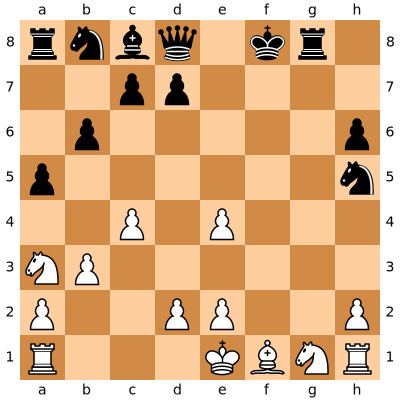

{'Rb1': ['Rb1', 'Active', False], 'KNb1': ['KNb1', 'Active'], 'Bb1': ['Bb1', 'Active'], 'Qb': ['Qb', 'Active'], 'Ib': ['Ib', 'Active', 'Moved'], 'Bb2': ['Bb2', 'Captured'], 'KNb2': ['KNb2', 'Active'], 'Rb2': ['Rb2', 'Active', 'Moved'], 'Pb1': ['Pb1', 'Active'], 'Pb2': ['Pb2', 'Active'], 'Pb3': ['Pb3', 'Active'], 'Pb4': ['Pb4', 'Active'], 'Pb5': ['Pb5', 'Captured'], 'Pb6': ['Pb6', 'Captured'], 'Pb7': ['Pb7', 'Captured'], 'Pb8': ['Pb8', 'Active'], 'Rw1': ['Rw1', 'Active', 'Moved'], 'KNw1': ['KNw1', 'Active'], 'Bw1': ['Bw1', 'Captured'], 'Qw': ['Qw', 'Captured'], 'Iw': ['Iw', 'Active', 'Moved'], 'Bw2': ['Bw2', 'Active'], 'KNw2': ['KNw2', 'Active'], 'Rw2': ['Rw2', 'Active', False], 'Pw1': ['Pw1', 'Active'], 'Pw2': ['Pw2', 'Active'], 'Pw3': ['Pw3', 'Active'], 'Pw4': ['Pw4', 'Active'], 'Pw5': ['Pw5', 'Active'], 'Pw6': ['Pw6', 'Active'], 'Pw7': ['Pw7', 'Captured'], 'Pw8': ['Pw8', 'Active'], 'blk': ['  ', 'Active']}
[['Rb1' 'KNb1' 'Bb1' 'Qb' 'blk' 'Ib' 'Rb2' 'blk']
 ['blk' 'blk' 'Pb3' 'Pb4' 'b

In [22]:
loadhistory(gamehistory, 26)
tie(pieces)
print(pieces)
print(board)